<a href="https://colab.research.google.com/github/kongruige/CompBioProject/blob/main/Sequence_Alignment_MCB_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MCB Block B - Practical 1 Sequence Alignment in Python

In this practical we will explore how to perform sequence alignment of both DNA and Protein Sequences using Python. This should cover a significant number of the concepts introduced in the lectures and build from your python experience in Block A.

In order to start we need some sequences to attempt to align.

In this first examples we will be aligning simple DNA sequences which have four nucleotides A T G C.
We will define these as two global strings called *sequence1* and *sequence2*

Hello


In [ ]:
sequence1="MALSPFLAAVIPLVLLLSRAPPSADTRTTGHLCGKDLVNALYIACGVRGFFYDPTKMKRDTGALAAFLPLAYAEDNESQDDESIGINEVLKSKRGIVEQCCHKRCSIYDLENYCN"
sequence2="MALWTRLRPLLALLALWPPPPARAFVNQHLCGSHLVEALYLVCGERGFFYTPKARREVEGPQVGALELAGGPGAGGLEGPPQKRGIVEQCCASVCSLYQLENYCN"

---------------------------------------

# Task 1
## Fetching some real sequences from a database
These seqeunces are ok to get started with. However, we would like to get some more interesting sequences for use later. We want two fetch two RNA sequences from the database and three Protein (amino-acid) sequences.

For the RNA sequences we will be fetching a pair of related (by duplication) microRNA precursor sequences from the **Ensembl** database.

## RNA Sequences (Ensembl)
The two RNA sequences we will fetch shal be let7a1 and let7a2 from Human.

To find these go [to Ensembl](https://www.ensembl.org/Homo_sapiens/Info/Index)

In the search box at the top type: **let-7a1**.
It should be the first hit that comes up *ENSG00000199165*.

Then click on **Sequence** on the left.
Cut and paste the sequence in bold red font.

Repeat the search for **let-7a2** and do the same.


## Protein Sequences (UniProt)

We will fetch some of the first proteins sequenced from the human database.

Go to the [UniProt Database](https://www.uniprot.org) at the European Bioinformatics Institute (EBI) and type **INSULIN** into the search box.

We want to fetch the following sequences:

**INS_HUMAN**

**INS_BOVIN**

You can also fetch an Insulin variant from another species, I chose Hag Fish!

Paste the sequences you've obtained into a code block below and give each sequence name.


In [ ]:

# The Human microRNA precursors obtained from Ensembl
Let7a1="TGGGATGAGGTAGTAGGTTGTATAGTTTTAGGGTCACACCCACCACTGGGAGATAACTATACAATCTACTGTCTTTCCTA"
Let7a2="AGGTTGAGGTAGTAGGTTGTATAGTTTAGAATTACATCAAGGGAGATAACTGTACAGCCTCCTAGCTTTCCT"

# The Insulin Proteins obtained from UniProt
Human_Insulin="MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN"
Bovine_Insulin="MALWTRLRPLLALLALWPPPPARAFVNQHLCGSHLVEALYLVCGERGFFYTPKARREVEGPQVGALELAGGPGAGGLEGPPQKRGIVEQCCASVCSLYQLENYCN"
Seahag_Insulin="MALSPFLAAVIPLVLLLSRAPPSADTRTTGHLCGKDLVNALYIACGVRGFFYDPTKMKRDTGALAAFLPLAYAEDNESQDDESIGINEVLKSKRGIVEQCCHKRCSIYDLENYCN"


# Place an insulin sequence you've found in here
My_Insulin=""

## Initial Code Setup
We will definitely be using numpy for numerical work and pandas the python data analysis library. Lets load both of those now.

Then they will be ready later when we are creating *numpy* and *pandas* objects.


In [ ]:
import pandas as pd
import numpy as np

## Setting up the search parameters

We will be using matrices for a dynamic programming alignment. In order to create those matrices we need to know the size of the search space.

This will be *l1 x l2* where *l1* is the length of the first sequence and *l2* is the length of the second sequence.

We will use *numpy* to generate two empty (zeroed) matrices corresponding to the size of the search space.

One Matrix *score_matrix* will contain the current score at each position in alignment space. The value in any given position is the score of an alignment ending at that point based on our heuristic and scoring system.

The other matrix *trace_matrix* will contain the decision made during dynamic programming that assigned the score at that position. For a tracing matrix we have 4 states.

## The Scoring System

For our initial alignments with nucleotides we will utilise a very simple scoring scheme.

| |A|T|G|C|-|
|-|-|-|-|-|-|
|A|+4|-4|-4|-4|-6|
|T|-4|+4|-4|-4|-6|
|G|-4|-4|+4|-4|-6|
|C|-4|-4|-4|+4|-6|
|-|-6|-6|-6|-6| |

In this scheme any nucleotide that directly matches is assigned +1.

Any mismatch between nucleotides is assigned -1.

Any gap introduced is assigned -1.

## The Traceback Matrix

|Trace Flag|Meaning|
|--|--|
|**DIAGONAL**| The alignment heuristic chose to move diagonally and assign or match or mismatch|
|**LEFT**|The alignment heuristic chose a gap in the left sequence
|**UP**| The alignment heuristic chose a gap in the upper sequence
|**STOP**| The alignment should end at this point |



Let's go ahead and create the scoring and tracing matrices for our sequences.

In [ ]:
# Prepare a traceback and scoring matrix for use below
row = len(sequence1) + 1
col = len(sequence2) + 1
tracing_matrix = np.zeros(shape=(row, col), dtype=int)  
score_matrix = np.zeros(shape=(row, col), dtype=int)  

## Needleman Wunsch Alignment

This should follow closely the pseudocode we covered in the lectures.

Remember that in Needleman Wunsch we are computing a *global* alignment starting from the begining of each sequence through alignment space to the end of both sequences.

This means that we will always start our traceback routine from the final cell of the matrix and traceback to position 0,0.

Because sequences arent always equal length we will initialise the traceback matrix with tracks back to the STOP position (0,0) for the first row and first column to ensure our traceback returns to the beginning. 



In [ ]:
# Assigning the constants for the scores
class Score(int):
    MATCH = 4
    MISMATCH = -4
    GAP = -6

# Assigning the constant values for the traceback
class Trace(int):
    STOP = 0
    LEFT = 1 
    UP = 2
    DIAGONAL = 3

# Implementing the Needleman-Wunsh global alignment
def needleman_wunsch(seq1, seq2):
    # Generating the empty matrices for storing scores and tracing
    row = len(seq1) + 1
    col = len(seq2) + 1
    
    score_matrix[:, :] = 0
    tracing_matrix[:, :] = 0
    
    # initalization of the matrix
    
    for i in range(1, row):
        score_matrix[i][0] = Score.GAP * i
        tracing_matrix[i][0] = Trace.UP
    
    for j in range(1, col):
        score_matrix[0][j] = Score.GAP * j
        tracing_matrix[0][j] = Trace.LEFT
    
    
    # Calculating the scores for all cells in the matrix
    for i in range(1, row):
        for j in range(1, col):
            # Calculating the diagonal score (match score)
            match_value = Score.MATCH if seq1[i - 1] == seq2[j - 1] else Score.MISMATCH
            diagonal_score = score_matrix[i - 1, j - 1] + match_value
            
            # Calculating the vertical gap score
            vertical_score = score_matrix[i - 1, j] + Score.GAP
            
            # Calculating the horizontal gap score
            horizontal_score = score_matrix[i, j - 1] + Score.GAP
            
            # Taking the highest score 
            score_matrix[i, j] = max(diagonal_score, vertical_score, horizontal_score)
            
            # Tracking where the cell's value is coming from                 
            if score_matrix[i, j] == horizontal_score: 
                tracing_matrix[i, j] = Trace.LEFT
                
            elif score_matrix[i, j] == vertical_score: 
                tracing_matrix[i, j] = Trace.UP
                
            elif score_matrix[i, j] == diagonal_score: 
                tracing_matrix[i, j] = Trace.DIAGONAL 
                
    
    # Initialising the variables for tracing
    aligned_seq1 = ""
    aligned_seq2 = ""   
    current_aligned_seq1 = ""   
    current_aligned_seq2 = ""  
    (max_i, max_j) = (row-1,col-1)
    
    # Tracing and computing the pathway with the global alignment
    while tracing_matrix[max_i, max_j] != Trace.STOP:
        if tracing_matrix[max_i, max_j] == Trace.DIAGONAL:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = seq2[max_j - 1]
            max_i = max_i - 1
            max_j = max_j - 1
            
        elif tracing_matrix[max_i, max_j] == Trace.UP:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = '-'
            max_i = max_i - 1    
            
        elif tracing_matrix[max_i, max_j] == Trace.LEFT:
            current_aligned_seq1 = '-'
            current_aligned_seq2 = seq2[max_j - 1]
            max_j = max_j - 1
            
        aligned_seq1 = aligned_seq1 + current_aligned_seq1
        aligned_seq2 = aligned_seq2 + current_aligned_seq2
    
    # Reversing the order of the sequences
    aligned_seq1 = aligned_seq1[::-1]
    aligned_seq2 = aligned_seq2[::-1]
    score = score_matrix[row-1,col-1]
    return aligned_seq1, aligned_seq2, score


### Running the code on two sequences
Now that we have made our needleman-wunsch subroutine, let's launch it with the two example sequences above.

In [ ]:
# Executing the Needleman Wunsch global alignment algorithm
output_1, output_2, score = needleman_wunsch(sequence1, sequence2)
    
print('Global Alignment Score:'+ str(score) + '\n'+'Sequence1:' + output_1 + '\n' + 'Sequence2:'  +  output_2)

Global Alignment Score:6
Sequence1:ATGTACTAG-TGTAATGC--A
Sequence2:ATGTAGTACATGCAAAAATTA


## Post Alignment Analysis
Now let's convert the numpy matrices into dataframes using pandas to take a look at what the alignment produced.

In [ ]:

pd.options.display.max_columns = None
trace_df = pd.DataFrame(tracing_matrix, 
                      index=[char for char in " " + sequence1], 
                      columns=[char for char in " " + sequence2])

score_df = pd.DataFrame(score_matrix, 
                      index=[char for char in " " + sequence1], 
                      columns=[char for char in " " + sequence2])

score_df

,,A,T,G,T,A,G,T,A,C,A,T,G,C,A,A,A,A,A,T,T,A
,0,-6,-12,-18,-24,-30,-36,-42,-48,-54,-60,-66,-72,-78,-84,-90,-96,-102,-108,-114,-120,-126
A,-6,4,-2,-8,-14,-20,-26,-32,-38,-44,-50,-56,-62,-68,-74,-80,-86,-92,-98,-104,-110,-116
T,-12,-2,8,2,-4,-10,-16,-22,-28,-34,-40,-46,-52,-58,-64,-70,-76,-82,-88,-94,-100,-106
G,-18,-8,2,12,6,0,-6,-12,-18,-24,-30,-36,-42,-48,-54,-60,-66,-72,-78,-84,-90,-96
T,-24,-14,-4,6,16,10,4,-2,-8,-14,-20,-26,-32,-38,-44,-50,-56,-62,-68,-74,-80,-86
A,-30,-20,-10,0,10,20,14,8,2,-4,-10,-16,-22,-28,-34,-40,-46,-52,-58,-64,-70,-76
C,-36,-26,-16,-6,4,14,16,10,4,6,0,-6,-12,-18,-24,-30,-36,-42,-48,-54,-60,-66
T,-42,-32,-22,-12,-2,8,10,20,14,8,2,4,-2,-8,-14,-20,-26,-32,-38,-44,-50,-56
A,-48,-38,-28,-18,-8,2,4,14,24,18,12,6,0,-6,-4,-10,-16,-22,-28,-34,-40,-46
G,-54,-44,-34,-24,-14,-4,6,8,18,20,14,8,10,4,-2,-8,-14,-20,-26,-32,-38,-44


In [ ]:
trace_df

,,A,T,G,T,A,G,T,A,C,A,T,G,C,A,A,A,A,A,T,T,A
,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
T,2,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
G,2,2,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
T,2,2,2,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A,2,2,2,2,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
C,2,2,2,2,2,2,3,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1
T,2,2,2,2,2,2,2,3,1,1,1,3,1,1,1,1,1,1,1,1,1,1
A,2,2,2,2,2,2,2,2,3,1,1,1,1,1,3,1,1,1,1,1,1,1
G,2,2,2,2,2,2,3,2,2,3,1,1,3,1,1,1,1,1,1,1,1,1


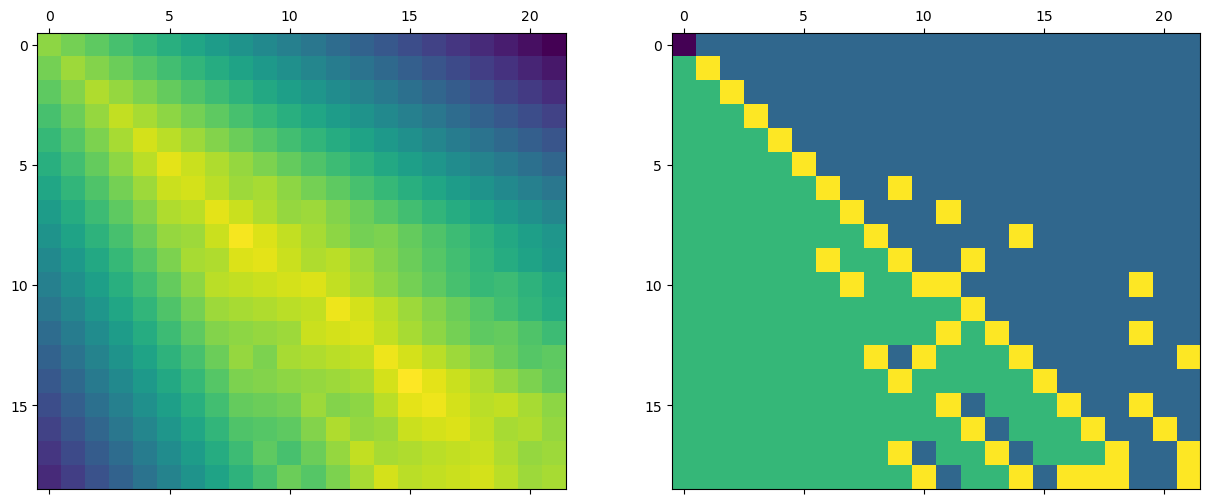

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(30)
ax[0].matshow(score_matrix)
ax[1].matshow(trace_df)

You should be able to see clearly from the traceback matrix and scoring matrix how the alignment was obtained.

To make the traceback even clearer, you could modify the traceback routine to change the value of cells that form the traceback route to a value such as -10 so that they are more clearly visible in the traceback matrix.

---------------------------------------
# Task 2 

Try changing the sequences you are searching. Perhaps align the *let-7a1* and *let-7a2* sequences you prepared earlier and explore the effect of different gap and match penalties on the resulting alignments.

To do this use the empty code blocks below to modify your needleman-wunsch subroutine and change the sequences being compared.

Please remember that if you are changing the sequences you will need to recreate a new traceback and scoring matrix as above to accomodate their lengths!


In [ ]:
# Use this code block to reinitialise your matrices for new sequences

# Prepare a traceback and scoring matrix for use below
row = len(Let7a1) + 1
col = len(Let7a2) + 1
tracing_matrix = np.zeros(shape=(row, col), dtype=int)  
score_matrix = np.zeros(shape=(row, col), dtype=int)  


In [ ]:
# Use this code block to paste in your needleman-wunsch code from above to modify it, such as changing gap
# or match scores to explore their effect.


# Assigning the constants for the scores
class Score(int):
    MATCH = 4
    MISMATCH = -4
    GAP = -6

# Assigning the constant values for the traceback
class Trace(int):
    STOP = 0
    LEFT = 1 
    UP = 2
    DIAGONAL = 3

# Implementing the Needleman-Wunsh global alignment
def needleman_wunsch(seq1, seq2):
    # Generating the empty matrices for storing scores and tracing
    row = len(seq1) + 1
    col = len(seq2) + 1
    
    score_matrix[:, :] = 0
    tracing_matrix[:, :] = 0
    
    # initalization of the matrix
    
    for i in range(1, row):
        score_matrix[i][0] = Score.GAP * i
        tracing_matrix[i][0] = Trace.UP
    
    for j in range(1, col):
        score_matrix[0][j] = Score.GAP * j
        tracing_matrix[0][j] = Trace.LEFT
    
    
    # Calculating the scores for all cells in the matrix
    for i in range(1, row):
        for j in range(1, col):
            # Calculating the diagonal score (match score)
            match_value = Score.MATCH if seq1[i - 1] == seq2[j - 1] else Score.MISMATCH
            diagonal_score = score_matrix[i - 1, j - 1] + match_value
            
            # Calculating the vertical gap score
            vertical_score = score_matrix[i - 1, j] + Score.GAP
            
            # Calculating the horizontal gap score
            horizontal_score = score_matrix[i, j - 1] + Score.GAP
            
            # Taking the highest score 
            score_matrix[i, j] = max(diagonal_score, vertical_score, horizontal_score)
            
            # Tracking where the cell's value is coming from                 
            if score_matrix[i, j] == horizontal_score: 
                tracing_matrix[i, j] = Trace.LEFT
                
            elif score_matrix[i, j] == vertical_score: 
                tracing_matrix[i, j] = Trace.UP
                
            elif score_matrix[i, j] == diagonal_score: 
                tracing_matrix[i, j] = Trace.DIAGONAL 
                
    
    # Initialising the variables for tracing
    aligned_seq1 = ""
    aligned_seq2 = ""   
    current_aligned_seq1 = ""   
    current_aligned_seq2 = ""  
    (max_i, max_j) = (row-1,col-1)
    
    # Tracing and computing the pathway with the global alignment
    while tracing_matrix[max_i, max_j] != Trace.STOP:
        if tracing_matrix[max_i, max_j] == Trace.DIAGONAL:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = seq2[max_j - 1]
            max_i = max_i - 1
            max_j = max_j - 1
            
        elif tracing_matrix[max_i, max_j] == Trace.UP:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = '-'
            max_i = max_i - 1    
            
        elif tracing_matrix[max_i, max_j] == Trace.LEFT:
            current_aligned_seq1 = '-'
            current_aligned_seq2 = seq2[max_j - 1]
            max_j = max_j - 1
            
        aligned_seq1 = aligned_seq1 + current_aligned_seq1
        aligned_seq2 = aligned_seq2 + current_aligned_seq2
    
    # Reversing the order of the sequences
    aligned_seq1 = aligned_seq1[::-1]
    aligned_seq2 = aligned_seq2[::-1]
    score = score_matrix[row-1,col-1]
    return aligned_seq1, aligned_seq2, score





In [ ]:
# Use this code block to run a NW on some different DNA sequences. 
output_1, output_2, score = needleman_wunsch(Let7a1,Let7a2)
    
print('Global Alignment Score:'+ str(score) + '\n'+'Sequence1:' + output_1 + '\n' + 'Sequence2:'  +  output_2)

Global Alignment Score:306
Sequence1:T-GGGAT-GAGGTAGTAGGTTGTATAGTTTTAGGG--TC-ACA-CCCACCACTGGGAGATAACTA-TACAAT-C-TAC-T-GTCTTTCCTA
Sequence2:-AGG--TTGAGGTAGTAGGTTGTATAGTTT-AG--AAT-TACATC--A--A--GGGAGATAACT-GTACA--GCCT-CCTAG-CTTTCCT-


In [ ]:
# Use this code block to look at the scoring and traceback matrices

pd.options.display.max_columns = None
trace_df = pd.DataFrame(tracing_matrix, 
                      index=[char for char in " " + Let7a1], 
                      columns=[char for char in " " + Let7a2])

score_df = pd.DataFrame(score_matrix, 
                      index=[char for char in " " + Let7a1], 
                      columns=[char for char in " " + Let7a2])

score_df, trace_df







(           A    G    G    T    T    G    A   G   G   T   A   G   T   A   G  \
       0   -2   -4   -6   -8  -10  -12  -14 -16 -18 -20 -22 -24 -26 -28 -30   
 T    -2   -4   -6   -8    0   -2   -4   -6  -8 -10 -12 -14 -16 -18 -20 -22   
 G    -4   -6    2    0   -2   -4    4    2   0  -2  -4  -6  -8 -10 -12 -14   
 G    -6   -8    0    8    6    4    2    0   8   6   4   2   0  -2  -4  -6   
 G    -8  -10   -2    6    4    2   10    8   6  14  12  10   8   6   4   2   
 ..  ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  ..  ..  ..  ..  ..   
 T  -152 -144 -136 -128 -120 -112 -104  -96 -88 -80 -72 -64 -56 -48 -40 -32   
 C  -154 -146 -138 -130 -122 -114 -106  -98 -90 -82 -74 -66 -58 -50 -42 -34   
 C  -156 -148 -140 -132 -124 -116 -108 -100 -92 -84 -76 -68 -60 -52 -44 -36   
 T  -158 -150 -142 -134 -126 -118 -110 -102 -94 -86 -78 -70 -62 -54 -46 -38   
 A  -160 -152 -144 -136 -128 -120 -112 -104 -96 -88 -80 -72 -64 -56 -48 -40   
 
      G   T   T   G   T   A   T   A   G   T   T   

# Task 3

Modify the Needleman-Wunsch code (above) in the empty boxes below to implement a *semi-global* alignment.

Remember from the lectures that to perform semi-global alignment you need to initialise the matrix differently.

You should initialise the first row and column of the matrix as zero and start your traceback from the largest value in the *last* row or *last* column of the scoring matrix.

*You should call your semi-global needleman-wunsch something else, e.g.*

```
def needleman_wunsch_semiglobal(seq1, seq2):
```


You can do this for the example sequences: *sequence1* and *sequence2* or the more extensive RNA sequences *Let-7a1* and *Let-7a2*

In [ ]:
# Use this code block to paste in your needleman-wunsch code from above to modify it


# Use this code block to paste in your needleman-wunsch code from above to modify it, such as changing gap
# or match scores to explore their effect.


# Assigning the constants for the scores
class Score(int):
    MATCH = 4
    MISMATCH = -4
    GAP = -6

# Assigning the constant values for the traceback
class Trace(int):
    STOP = 0
    LEFT = 1 
    UP = 2
    DIAGONAL = 3

# Implementing the Needleman-Wunsh global alignment
def needleman_wunsch_semiglobal(seq1, seq2):
    # Generating the empty matrices for storing scores and tracing
    row = len(seq1) + 1
    col = len(seq2) + 1
    
    tracing_matrix = np.zeros(shape=(row, col), dtype=int)  
    score_matrix = np.zeros(shape=(row, col), dtype=int)  
    
    score_matrix[:, :] = 0
    tracing_matrix[:, :] = 0
    
    # initalization of the matrix: for semi-global alignment simply set the 1st row and column to be zero
    
    
    # Calculating the scores for all cells in the matrix
    for i in range(1, row):
        for j in range(1, col):
            # Calculating the diagonal score (match score)
            match_value = Score.MATCH if seq1[i - 1] == seq2[j - 1] else Score.MISMATCH
            diagonal_score = score_matrix[i - 1, j - 1] + match_value
            
            # Calculating the vertical gap score
            vertical_score = score_matrix[i - 1, j] + Score.GAP
            
            # Calculating the horizontal gap score
            horizontal_score = score_matrix[i, j - 1] + Score.GAP
            
            # Taking the highest score 
            score_matrix[i, j] = max(diagonal_score, vertical_score, horizontal_score)
            
            # Tracking where the cell's value is coming from                 
            if score_matrix[i, j] == horizontal_score: 
                tracing_matrix[i, j] = Trace.LEFT
                
            elif score_matrix[i, j] == vertical_score: 
                tracing_matrix[i, j] = Trace.UP
                
            elif score_matrix[i, j] == diagonal_score: 
                tracing_matrix[i, j] = Trace.DIAGONAL 
                
    
    # Initialising the variables for tracing
    aligned_seq1 = ""
    aligned_seq2 = ""   
    current_aligned_seq1 = ""   
    current_aligned_seq2 = ""  
    max_col_index = (np.argmax(score_matrix[:,-1]),col-1)
    max_row_index = (row-1,np.argmax(score_matrix[-1,:]))
    
    
    (max_i, max_j) = max_col_index if score_matrix[np.argmax(score_matrix[:,-1]),-1] > score_matrix[-1,np.argmax(score_matrix[-1,:])] else max_row_index
    
    print(max_i,max_j)
    # Tracing and computing the pathway with the global alignment
    while tracing_matrix[max_i, max_j] != Trace.STOP:
        if tracing_matrix[max_i, max_j] == Trace.DIAGONAL:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = seq2[max_j - 1]
            max_i = max_i - 1
            max_j = max_j - 1
            
        elif tracing_matrix[max_i, max_j] == Trace.UP:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = '-'
            max_i = max_i - 1    
            
        elif tracing_matrix[max_i, max_j] == Trace.LEFT:
            current_aligned_seq1 = '-'
            current_aligned_seq2 = seq2[max_j - 1]
            max_j = max_j - 1
            
        aligned_seq1 = aligned_seq1 + current_aligned_seq1
        aligned_seq2 = aligned_seq2 + current_aligned_seq2
    
    # Reversing the order of the sequences
    aligned_seq1 = aligned_seq1[::-1]
    aligned_seq2 = aligned_seq2[::-1]
    score = score_matrix[row-1,col-1]
    return aligned_seq1, aligned_seq2, score, tracing_matrix, score_matrix









In [ ]:
np.argmax([1,2,3])

2

In [ ]:
# Use this code block to run a NW on some different DNA sequences. 
output_1, output_2, score, tracing_matrix, score_matrix = needleman_wunsch_semiglobal(Let7a1,Let7a2)
    
print('Global Alignment Score:'+ str(score) + '\n'+'Sequence1:' + output_1 + '\n' + 'Sequence2:'  +  output_2)





79 72
Global Alignment Score:150
Sequence1:GGGATGAGGTAGTAGGTTGTATAGTTTTAGGGTCACACCCACCACTGGGAGATAACTATACAATCTACT-GTCTTTCCT
Sequence2:AGGTTGAGGTAGTAGGTTGTATAGTTT-AGAATTACATC-A--A--GGGAGATAACTGTACAGCCTCCTAG-CTTTCCT


In [ ]:
# Use this code block to look at the scoring and traceback matrices and do anything post-alignment




pd.options.display.max_columns = None
trace_df = pd.DataFrame(tracing_matrix, 
                      index=[char for char in " " + Let7a1], 
                      columns=[char for char in " " + Let7a2])

score_df = pd.DataFrame(score_matrix, 
                      index=[char for char in " " + Let7a1], 
                      columns=[char for char in " " + Let7a2])

trace_df








,,A,G,G,T,T,G,A,G,G,T,A,G,T,A,G,G,T,T,G,T,A,T,A,G,T,T,T,A,G,A,A,T,T,A,C,A,T,C,A,A,G,G,G,A,G,A,T,A,A,C,T,G,T,A,C,A,G,C,C,T,C,C,T,A,G,C,T,T,T,C,C,T
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T,0,3,3,3,3,3,1,3,3,3,3,1,3,3,1,3,3,3,3,1,3,1,3,1,3,3,3,3,1,3,3,3,3,3,1,3,3,3,1,3,3,3,3,3,3,3,3,3,1,3,3,3,1,3,1,3,3,3,3,3,3,1,3,3,1,3,3,3,3,3,1,3,3
G,0,3,3,3,2,3,3,1,3,3,2,3,3,2,3,3,3,2,3,3,1,3,2,3,3,2,3,3,3,3,1,3,2,3,3,1,3,2,3,1,3,3,3,3,1,3,1,2,3,1,3,2,3,1,3,1,3,3,1,3,2,3,1,2,3,3,1,2,3,3,3,1,2
G,0,3,3,3,1,2,3,3,3,3,1,2,3,1,2,3,3,1,1,3,3,1,3,2,3,1,2,3,3,3,1,1,2,2,3,3,1,2,2,3,1,3,3,3,1,3,3,2,2,3,1,2,2,3,1,3,1,3,3,1,2,2,3,2,2,3,1,1,2,3,3,3,2
G,0,3,3,3,3,1,2,3,3,3,1,1,2,3,1,2,3,1,1,2,3,3,1,3,2,3,1,2,3,3,3,1,1,2,2,3,3,1,2,2,3,3,3,3,1,3,1,3,2,2,3,1,2,2,3,1,3,3,3,3,1,2,2,3,2,2,3,1,1,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T,0,3,3,3,3,3,3,3,1,1,2,3,1,2,3,1,1,3,3,1,3,1,2,2,3,3,2,2,3,1,1,1,3,2,3,1,1,2,3,2,2,3,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,3,1,1,1
C,0,3,3,3,2,2,3,3,3,1,1,2,3,2,2,3,1,2,2,3,1,3,1,2,2,2,2,2,2,3,1,1,1,2,2,3,1,1,3,1,2,2,3,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,3,2,2,2,3,2,2,2,3,1,1
C,0,3,3,3,3,2,2,3,3,3,1,1,2,3,2,2,3,1,2,2,3,1,3,1,2,2,2,2,2,2,3,1,1,2,2,2,3,1,3,1,1,2,2,3,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,1
T,0,3,3,3,3,3,1,2,3,3,3,1,1,3,1,2,2,3,1,1,3,1,3,1,1,3,3,2,2,2,2,3,3,1,1,2,2,3,1,1,1,1,2,2,3,1,1,3,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,3,1,2,2,3,2,2,2,2,3


# Smith-Waterman Local Alignment

We will now modify the Needleman-Wunsch algorithm to follow the correct implementation for Smith-Waterman local alignment.

We will initialise the matrix first row and column with zeros.

We will start our traceback from the **maximum** cell obtained in the scoring matrix.

We will never add negative values to the matrix but instead a zero value.

Zero values in the traceback will halt the alignment.

We will change our traceback class **Trace** to have a **STOP** value.

Before we start, lets recreate our emptye matrices:

In [ ]:
# Reinitialise our simple DNA sequences for next example
row = len(sequence1) + 1
col = len(sequence2) + 1
tracing_matrix = np.zeros(shape=(row, col), dtype=int)  
score_matrix = np.zeros(shape=(row, col), dtype=int)  

Now lets declare a Smith-Waterman Function for Local Alignment.

Please note that we've made significant changes for matrix initialisation and the way the traceback routine works this time.

In [ ]:

# Assigning the constants for the scores
class Score(int):
    MATCH = 4
    MISMATCH = -4
    GAP = -6

# Assigning the constant values for the traceback
class Trace(int):
    STOP = 0
    LEFT = 1 
    UP = 2
    DIAGONAL = 3

# Implementing the Smith Waterman local alignment
def smith_waterman(seq1, seq2):
    # Generating the empty matrices for storing scores and tracing
    row = len(seq1) + 1
    col = len(seq2) + 1
    
    score_matrix[:, :] = 0
    tracing_matrix[:, :] = 0
    
    # Initialising the variables to find the highest scoring cell
    max_score = -1
    max_index = (-1, -1)
    
    # Calculating the scores for all cells in the matrix
    for i in range(1, row):
        for j in range(1, col):
            # Calculating the diagonal score (match score)
            match_value = Score.MATCH if seq1[i - 1] == seq2[j - 1] else Score.MISMATCH
            diagonal_score = score_matrix[i - 1, j - 1] + match_value
            
            # Calculating the vertical gap score
            vertical_score = score_matrix[i - 1, j] + Score.GAP
            
            # Calculating the horizontal gap score
            horizontal_score = score_matrix[i, j - 1] + Score.GAP
            
            # Taking the highest score 
            score_matrix[i, j] = max(0,diagonal_score, vertical_score, horizontal_score)
            
            # Tracking where the cell's value is coming from    
            if score_matrix[i, j] == 0: 
                tracing_matrix[i, j] = Trace.STOP
                
            elif score_matrix[i, j] == horizontal_score: 
                tracing_matrix[i, j] = Trace.LEFT
                
            elif score_matrix[i, j] == vertical_score: 
                tracing_matrix[i, j] = Trace.UP
                
            elif score_matrix[i, j] == diagonal_score: 
                tracing_matrix[i, j] = Trace.DIAGONAL 
                
            # Tracking the cell with the maximum score
            if score_matrix[i, j] >= max_score:
                max_index = (i,j)
                max_score = score_matrix[i, j]
    
    # Initialising the variables for tracing
    aligned_seq1 = ""
    aligned_seq2 = ""   
    current_aligned_seq1 = ""   
    current_aligned_seq2 = ""  
    (max_i, max_j) = max_index
    
    # Tracing and computing the pathway with the local alignment
    while tracing_matrix[max_i, max_j] != Trace.STOP:
        if tracing_matrix[max_i, max_j] == Trace.DIAGONAL:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = seq2[max_j - 1]
            max_i = max_i - 1
            max_j = max_j - 1
            
        elif tracing_matrix[max_i, max_j] == Trace.UP:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = '-'
            max_i = max_i - 1    
            
        elif tracing_matrix[max_i, max_j] == Trace.LEFT:
            current_aligned_seq1 = '-'
            current_aligned_seq2 = seq2[max_j - 1]
            max_j = max_j - 1
            
        aligned_seq1 = aligned_seq1 + current_aligned_seq1
        aligned_seq2 = aligned_seq2 + current_aligned_seq2
    
    # Reversing the order of the sequences
    aligned_seq1 = aligned_seq1[::-1]
    aligned_seq2 = aligned_seq2[::-1]
    return aligned_seq1, aligned_seq2, max_score


In [ ]:
output_1, output_2, score = smith_waterman(sequence1, sequence2)
print('Local Alignment Score:'+ str(score) + '\n'+'Sequence1:' + output_1 + '\n' + 'Sequence2:'  +  output_2)

Local Alignment Score:52
Sequence1:KRGIVEQCCHKRCSIYDLENYCN
Sequence2:KRGIVEQCCASVCSLYQLENYCN


## Post Local Alignment Analysis

Lets explore the traceback and scoring matrices, you should be able to see significant differences between a local vs a global alignment here.


In [ ]:

trace_df = pd.DataFrame(tracing_matrix, 
                      index=[char for char in " " + sequence1], 
                      columns=[char for char in " " + sequence2])

score_df = pd.DataFrame(score_matrix, 
                      index=[char for char in " " + sequence1], 
                      columns=[char for char in " " + sequence2])

score_df

,,M,A,L,W,T,R,L,R,P,L,L,A,L,L,A,L,W,P,P,P,P,A,R,A,F,V,N,Q,H,L,C,G,S,H,L,V,E,A,L,Y,L,V,C,G,E,R,G,F,F,Y,T,P,K,A,R,R,E,V,E,G,P,Q,V,G,A,L,E,L,A,G,G,P,G,A,G,G,L,E,G,P,P,Q,K,R,G,I,V,E,Q,C,C,A,S,V,C,S,L,Y,Q,L,E,N,Y,C,N
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
M,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A,0,0,8,2,0,0,0,0,0,0,0,0,4,0,0,4,0,0,0,0,0,0,4,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0
L,0,0,2,12,6,0,0,4,0,0,4,4,0,8,4,0,8,2,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,4,0,0,0,8,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,4,0,0,0,0,0
S,0,0,0,6,8,2,0,0,0,0,0,0,0,2,4,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,4,0,0,0,0,0,0,0,8,2,0,0,0,0,0,0,0,0,0,8,2,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,2,12,14,16,26,36,30,24,18,12
N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,8,10,20,30,40,34,28,22
Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,4,14,24,34,44,38,32
C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0,0,0,4,0,0,4,6,8,18,28,38,48,42


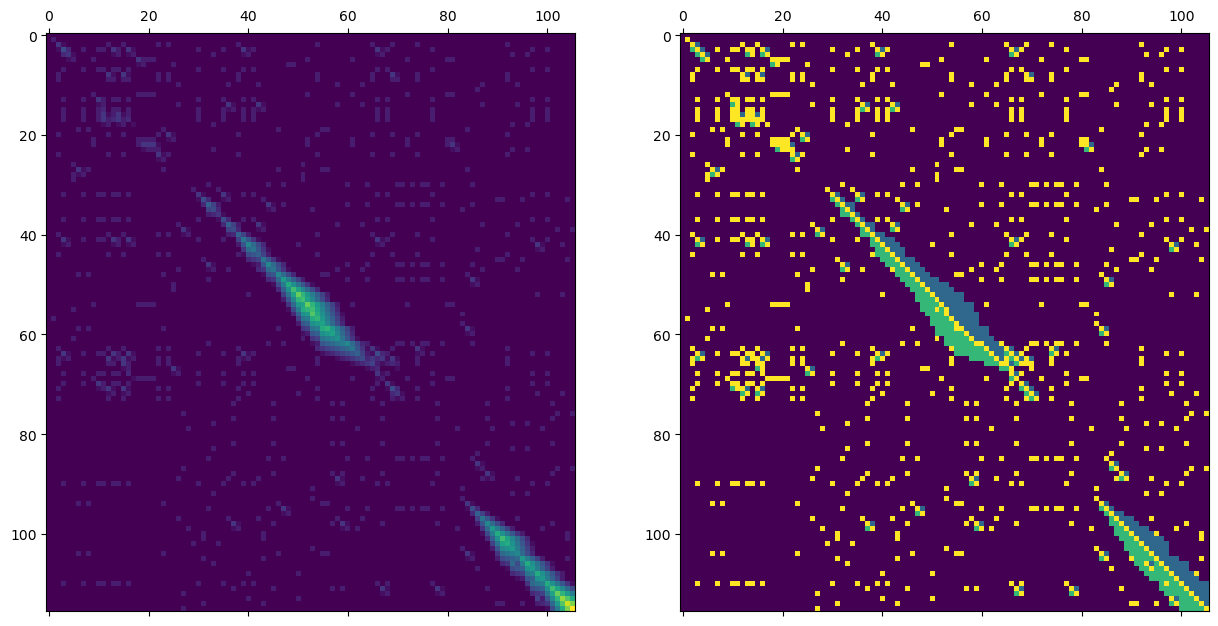

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(30)
ax[0].matshow(score_matrix)
ax[1].matshow(trace_df)


# Task 4
You should see how the traceback is now performing from a local alignment instead of a global alignment.

Try running some of the other DNA sequences above to see how they perform

In [ ]:
# Use this code block to recreate some matrices for new sequences



# Assigning the constants for the scores
class Score(int):
    MATCH = 4
    MISMATCH = -4
    GAP = -6

# Assigning the constant values for the traceback
class Trace(int):
    STOP = 0
    LEFT = 1 
    UP = 2
    DIAGONAL = 3

# Implementing the Smith Waterman local alignment
def smith_waterman(seq1, seq2):
    # Generating the empty matrices for storing scores and tracing
    row = len(seq1) + 1
    col = len(seq2) + 1
    
    score_matrix[:, :] = 0
    tracing_matrix[:, :] = 0
    
    # Initialising the variables to find the highest scoring cell
    max_score = -1
    max_index = (-1, -1)
    
    # Calculating the scores for all cells in the matrix
    for i in range(1, row):
        for j in range(1, col):
            # Calculating the diagonal score (match score)
            match_value = Score.MATCH if seq1[i - 1] == seq2[j - 1] else Score.MISMATCH
            diagonal_score = score_matrix[i - 1, j - 1] + match_value
            
            # Calculating the vertical gap score
            vertical_score = score_matrix[i - 1, j] + Score.GAP
            
            # Calculating the horizontal gap score
            horizontal_score = score_matrix[i, j - 1] + Score.GAP
            
            # Taking the highest score 
            score_matrix[i, j] = max(0,diagonal_score, vertical_score, horizontal_score)
            
            # Tracking where the cell's value is coming from    
            if score_matrix[i, j] == 0: 
                tracing_matrix[i, j] = Trace.STOP
                
            elif score_matrix[i, j] == horizontal_score: 
                tracing_matrix[i, j] = Trace.LEFT
                
            elif score_matrix[i, j] == vertical_score: 
                tracing_matrix[i, j] = Trace.UP
                
            elif score_matrix[i, j] == diagonal_score: 
                tracing_matrix[i, j] = Trace.DIAGONAL 
                
            # Tracking the cell with the maximum score
            if score_matrix[i, j] >= max_score:
                max_index = (i,j)
                max_score = score_matrix[i, j]
    
    # Initialising the variables for tracing
    aligned_seq1 = ""
    aligned_seq2 = ""   
    current_aligned_seq1 = ""   
    current_aligned_seq2 = ""  
    (max_i, max_j) = max_index
    
    # Tracing and computing the pathway with the local alignment
    while tracing_matrix[max_i, max_j] != Trace.STOP:
        if tracing_matrix[max_i, max_j] == Trace.DIAGONAL:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = seq2[max_j - 1]
            max_i = max_i - 1
            max_j = max_j - 1
            
        elif tracing_matrix[max_i, max_j] == Trace.UP:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = '-'
            max_i = max_i - 1    
            
        elif tracing_matrix[max_i, max_j] == Trace.LEFT:
            current_aligned_seq1 = '-'
            current_aligned_seq2 = seq2[max_j - 1]
            max_j = max_j - 1
            
        aligned_seq1 = aligned_seq1 + current_aligned_seq1
        aligned_seq2 = aligned_seq2 + current_aligned_seq2
    
    # Reversing the order of the sequences
    aligned_seq1 = aligned_seq1[::-1]
    aligned_seq2 = aligned_seq2[::-1]
    return aligned_seq1, aligned_seq2, max_score






In [ ]:
# Use this code block to run a SW on your new sequences
output_1, output_2, score = smith_waterman(Let7a1,Let7a2)
print('Local Alignment Score:'+ str(score) + '\n'+'Sequence1:' + output_1 + '\n' + 'Sequence2:'  +  output_2)







Local Alignment Score:160
Sequence1:GGATGAGGTAGTAGGTTGTATAGTTTTAGGGTCACACCCACCACTGGGAGATAACTATACAATCTACT-GTCTTTCCT
Sequence2:GGTTGAGGTAGTAGGTTGTATAGTTT-AGAATTACATC-A--A--GGGAGATAACTGTACAGCCTCCTAG-CTTTCCT


In [ ]:
# Use this code block to look at the scoring and traceback matrices and do anything post-alignment

trace_df = pd.DataFrame(tracing_matrix, 
                      index=[char for char in " " + Let7a1], 
                      columns=[char for char in " " + Let7a2])

score_df = pd.DataFrame(score_matrix, 
                      index=[char for char in " " + Let7a1], 
                      columns=[char for char in " " + Let7a2])

score_df







,,A,G,G,T,T,G,A,G,G,T,A,G,T,A,G,G,T,T,G,T,A,T,A,G,T,T,T,A,G,A,A,T,T,A,C,A,T,C,A,A,G,G,G,A,G,A,T,A,A,C,T,G,T,A,C,A,G,C,C,T,C,C,T,A,G,C,T,T,T,C,C,T
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Working with Amino Acid Sequences

We will now need to modify the Python code to deal with amino-acids. Remember we will no longer be just happy with a match between two amino acids, we need to use a scoring matrix to define how similar two amino-acids are based on their physiochemical properties.

In these examples we will be using the **BLOSUM62** matrix. It is stored on your computers as a text file which we will load into memory and store as an object. The Dynamic Programming code can then quickly look up a pair of amino acids it is considering, during the DP and assign an evolutionarily consistent match or mismatch score.

Before we start lets choose a pair of proteins to work with:

In [ ]:
Protein1 = str(Human_Insulin)
Protein2 = str(Seahag_Insulin)

We need to reinitialise our traceback and scoring matrices. Lets do that now.

In [ ]:
row = len(Protein1) + 1
col = len(Protein2) + 1
tracing_matrix = np.zeros(shape=(row, col), dtype=int)  
score_matrix = np.zeros(shape=(row, col), dtype=int)  

output_1, output_2, score = smith_waterman(Protein1, Protein2)
print('Local Alignment Score:'+ str(score) + '\n'+'Sequence1:' + output_1 + '\n' + 'Sequence2:'  +  output_2)

Local Alignment Score:52
Sequence1:KRGIVEQCCTSICSLYQLENYCN
Sequence2:KRGIVEQCCHKRCSIYDLENYCN


This initial attempt using our old code gives a poor alignment and a low score. This is because we are still demanding that amino-acids are **exact** matches of each other.

We need to now load the BLOSUM matrix and store it as an object.

We will call this object *blosum62* and it will be a pandas dataframe which can be looked up using character strings for amino-acids.

In [ ]:
# Define a list of all amino acids in an array:
amino_acids=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V','B','Z','X']

# Make a new matrix (bmat) and populate with values obtained from BLOSUM62
bmat = np.matrix([[4,-1,-2,-2,0,-1,-1,0,-2,-1,-1,-1,-1,-2,-1,1,0,-3,-2,0,-2,-1,0],
[-1,5,0,-2,-3,1,0,-2,0,-3,-2,2,-1,-3,-2,-1,-1,-3,-2,-3,-1,0,-1],
[-2,0,6,1,-3,0,0,0,1,-3,-3,0,-2,-3,-2,1,0,-4,-2,-3,3,0,-1],
[-2,-2,1,6,-3,0,2,-1,-1,-3,-4,-1,-3,-3,-1,0,-1,-4,-3,-3,4,1,-1],
[0,-3,-3,-3,9,-3,-4,-3,-3,-1,-1,-3,-1,-2,-3,-1,-1,-2,-2,-1,-3,-3,-2],
[-1,1,0,0,-3,5,2,-2,0,-3,-2,1,0,-3,-1,0,-1,-2,-1,-2,0,3,-1],
[-1,0,0,2,-4,2,5,-2,0,-3,-3,1,-2,-3,-1,0,-1,-3,-2,-2,1,4,-1],
[0,-2,0,-1,-3,-2,-2,6,-2,-4,-4,-2,-3,-3,-2,0,-2,-2,-3,-3,-1,-2,-1],
[-2,0,1,-1,-3,0,0,-2,8,-3,-3,-1,-2,-1,-2,-1,-2,-2,2,-3,0,0,-1], 
[-1,-3,-3,-3,-1,-3,-3,-4,-3,4,2,-3,1,0,-3,-2,-1,-3,-1,3,-3,-3,-1],
[-1,-2,-3,-4,-1,-2,-3,-4,-3,2,4,-2,2,0,-3,-2,-1,-2,-1,1,-4,-3,-1],
[-1,2,0,-1,-3,1,1,-2,-1,-3,-2,5,-1,-3,-1,0,-1,-3,-2,-2,0,1,-1],
[-1,-1,-2,-3,-1,0,-2,-3,-2,1,2,-1,5,0,-2,-1,-1,-1,-1,1,-3,-1,-1],
[-2,-3,-3,-3,-2,-3,-3,-3,-1,0,0,-3,0,6,-4,-2,-2,1,3,-1,-3,-3,-1],
[-1,-2,-2,-1,-3,-1,-1,-2,-2,-3,-3,-1,-2,-4,7,-1,-1,-4,-3,-2,-2,-1,-2],
[1,-1,1,0,-1,0,0,0,-1,-2,-2,0,-1,-2,-1,4,1,-3,-2,-2,0,0,0], 
[0,-1,0,-1,-1,-1,-1,-2,-2,-1,-1,-1,-1,-2,-1,1,5,-2,-2,0,-1,-1,0],
[-3,-3,-4,-4,-2,-2,-3,-2,-2,-3,-2,-3,-1,1,-4,-3,-2,11,2,-3,-4,-3,-2],
[-2,-2,-2,-3,-2,-1,-2,-3,2,-1,-1,-2,-1,3,-3,-2,-2,2,7,-1,-3,-2,-1],
[0,-3,-3,-3,-1,-2,-2,-3,-3,3,1,-2,1,-1,-2,-2,0,-3,-1,4,-3,-2,-1],
[-2,-1,3,4,-3,0,1,-1,0,-3,-4,0,-3,-3,-2,0,-1,-4,-3,-3,4,1,-1],
[-1,0,0,1,-3,3,4,-2,0,-3,-3,1,-1,-3,-1,0,-1,-3,-2,-2,1,4,-1],
[0,-1,-1,-1,-2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-2,0,0,-2,-1,-1,-1,-1,-1]])

# Turn this object into a dataframe that can be accessed by amino-acid characters directy
blosum62 = pd.DataFrame(bmat, columns=amino_acids, index=amino_acids)



### Testing the BLOSUM matrix

Lets look up some values for Leucine vs Leucine, Leucine vs Valine and 'X' (unknown) vs Methionine

We can also use the *seaborn* plotting package to make a heatmap of the scoring matrix.

L:L -> 4
L:V -> 1
X:M -> -1


<AxesSubplot:>

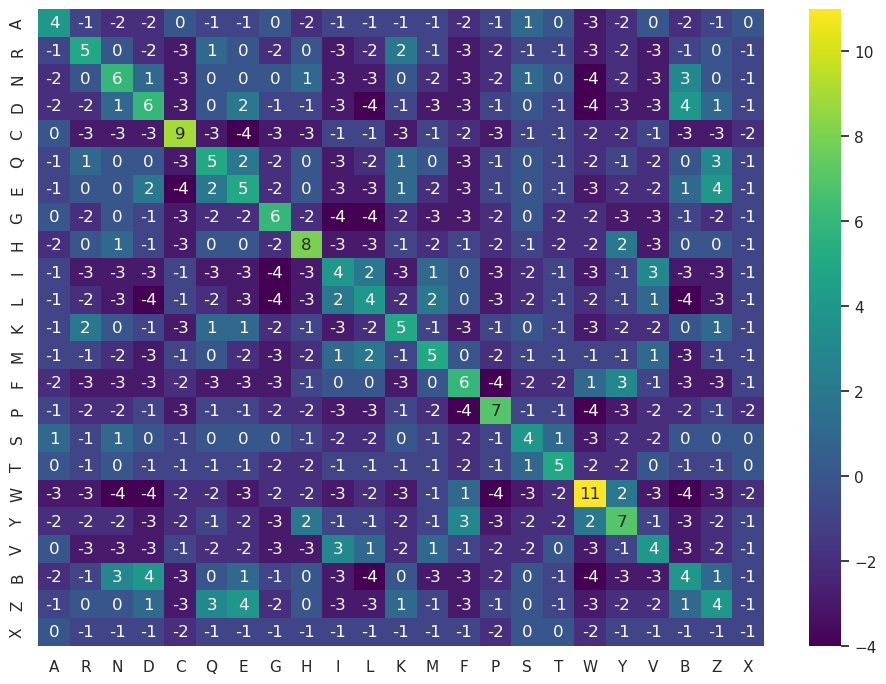

In [ ]:
print("L:L -> " + str(blosum62['L']['L']))
print("L:V -> " + str(blosum62['L']['V']))
print("X:M -> " + str(blosum62['X']['M']))


import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(blosum62, annot=True,cmap=sns.color_palette("viridis", as_cmap=True))


# Task 5
Modifying our Smith Waterman to use a Scoring Matrix

Please modify the code in the block below.

You'll nee to remove *MATCH* and *MISMATCH* from the *Score* class and then modify the highlighted code later in the script where match_value is computed.

Our match values below (*match_value*) are now obtained by direct lookup of an amino-acid pair from the new blosum matrix (*bmat*)

For instance the *MATCH* or *MISMATCH* score for amino acid *i* in seq1 versus amino acid *j* in sequence2 is:
```
blosum62[seq1[i - 1][seq2[j-1]]
```

In [ ]:

# Assigning the constants for the scores
class Score(int):
    # You will no longer be using these MATCH and MISMATCH VALUES, YOU CAN DELETE THEM AND KEEP ONLY THE GAP PENALTY
    GAP = -6

# Assigning the constant values for the traceback
class Trace(int):
    STOP = 0
    LEFT = 1 
    UP = 2
    DIAGONAL = 3

# Implementing the Smith Waterman local alignment
def smith_waterman(seq1, seq2):
    # Generating the empty matrices for storing scores and tracing
    row = len(seq1) + 1
    col = len(seq2) + 1
    
    score_matrix[:, :] = 0
    tracing_matrix[:, :] = 0
    
    # Initialising the variables to find the highest scoring cell
    max_score = -1
    max_index = (-1, -1)
    
    # Calculating the scores for all cells in the matrix
    for i in range(1, row):
        for j in range(1, col):
            # Calculating the diagonal score (match score)
            #
            #
            #   This is the code you will need to change if you are to use the new scoring matrix
            #
            #
            match_value = blosum62.loc[seq2[j-1]][seq1[i-1]]
            diagonal_score = score_matrix[i - 1, j - 1] + match_value
            
            
            # Calculating the vertical gap score
            vertical_score = score_matrix[i - 1, j] + Score.GAP
            
            # Calculating the horizontal gap score
            horizontal_score = score_matrix[i, j - 1] + Score.GAP
            
            # Taking the highest score 
            score_matrix[i, j] = max(0,diagonal_score, vertical_score, horizontal_score)
            
            # Tracking where the cell's value is coming from    
            if score_matrix[i, j] == 0: 
                tracing_matrix[i, j] = Trace.STOP
                
            elif score_matrix[i, j] == horizontal_score: 
                tracing_matrix[i, j] = Trace.LEFT
                
            elif score_matrix[i, j] == vertical_score: 
                tracing_matrix[i, j] = Trace.UP
                
            elif score_matrix[i, j] == diagonal_score: 
                tracing_matrix[i, j] = Trace.DIAGONAL 
                
            # Tracking the cell with the maximum score
            if score_matrix[i, j] >= max_score:
                max_index = (i,j)
                max_score = score_matrix[i, j]
    
    # Initialising the variables for tracing
    aligned_seq1 = ""
    aligned_seq2 = ""   
    current_aligned_seq1 = ""   
    current_aligned_seq2 = ""  
    (max_i, max_j) = max_index
    
    # Tracing and computing the pathway with the local alignment
    while tracing_matrix[max_i, max_j] != Trace.STOP:
        if tracing_matrix[max_i, max_j] == Trace.DIAGONAL:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = seq2[max_j - 1]
            max_i = max_i - 1
            max_j = max_j - 1
            
        elif tracing_matrix[max_i, max_j] == Trace.UP:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = '-'
            max_i = max_i - 1    
            
        elif tracing_matrix[max_i, max_j] == Trace.LEFT:
            current_aligned_seq1 = '-'
            current_aligned_seq2 = seq2[max_j - 1]
            max_j = max_j - 1
            
        aligned_seq1 = aligned_seq1 + current_aligned_seq1
        aligned_seq2 = aligned_seq2 + current_aligned_seq2
    
    # Reversing the order of the sequences
    aligned_seq1 = aligned_seq1[::-1]
    aligned_seq2 = aligned_seq2[::-1]
    return aligned_seq1, aligned_seq2, max_score
blosum62.loc[Protein2[5]][Protein1[6]]

0

In [ ]:
# Executing the Smith Waterman local alignment algorithm
output_1, output_2, score = smith_waterman(Protein1, Protein2)
    
print('Local Alignment Score:'+ str(score) + '\n'+'Sequence1:' + output_1 + '\n' + 'Sequence2:'  +  output_2)

Local Alignment Score:206
Sequence1:LLPLLALLALWGPDPAA-AFVNQHLCGSHLVEALYLVCGERGFFYTP-KTRREAEDLQVGQVELGGGPGAGSL--QPLALEGSLQ-KRGIVEQCCTSICSLYQLENYCN
Sequence2:VIPLVLLLSR-AP-PSADTRTTGHLCGKDLVNALYIACGVRGFFYDPTKMKRDTGAL-AAFLPLAYAEDNESQDDESIGINEVLKSKRGIVEQCCHKRCSIYDLENYCN


# Post Alignment Analysis

If you've got this working it should already be a much better alignment as it uses the BLOSUM matrix to align residues which have similar physiochemical properties.

These are long sequences which large matrices, but we can still explore how they look using matplot


In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

trace_df = pd.DataFrame(tracing_matrix, 
                      index=[char for char in " " + Protein1], 
                      columns=[char for char in " " + Protein2])

score_df = pd.DataFrame(score_matrix, 
                      index=[char for char in " " + Protein1], 
                      columns=[char for char in " " + Protein2])

score_df

,,M,A,L,S,P,F,L,A,A,V,I,P,L,V,L,L,L,S,R,A,P,P,S,A,D,T,R,T,T,G,H,L,C,G,K,D,L,V,N,A,L,Y,I,A,C,G,V,R,G,F,F,Y,D,P,T,K,M,K,R,D,T,G,A,L,A,A,F,L,P,L,A,Y,A,E,D,N,E,S,Q,D,D,E,S,I,G,I,N,E,V,L,K,S,K,R,G,I,V,E,Q,C,C,H,K,R,C,S,I,Y,D,L,E,N,Y,C,N
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
M,0,5,0,2,0,0,0,2,0,0,1,1,0,2,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,1,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,2,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0
A,0,0,9,3,3,0,0,0,6,4,0,0,0,0,2,0,1,1,3,0,4,0,0,1,4,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,4,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,4,0,6,4,0,0,1,0,6,0,4,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
L,0,2,3,13,7,1,0,4,0,5,5,2,0,4,1,6,4,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,4,1,0,0,8,2,2,0,4,0,1,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,8,2,5,4,4,0,5,0,5,0,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,1,4,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,0,4,0,0,0,0,0
W,0,0,0,7,10,4,2,0,1,0,2,2,0,0,1,0,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,2,10,4,0,0,2,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,2,5,0,6,2,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,0,2,0,0
M,0,5,0,2,6,8,4,4,0,0,1,3,0,2,1,3,2,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,1,0,0,2,4,11,5,0,0,3,0,0,0,1,0,0,0,0,0,5,0,0,0,0,0,0,2,1,4,0,8,2,2,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,2,2,0,0,0,1,0
R,0,0,4,0,1,4,5,2,3,0,0,0,1,0,0,0,1,0,5,6,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,5,10,4,0,0,8,2,0,0,0,0,0,0,2,0,7,5,0,0,0,0,0,1,0,1,2,6,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,4,0,2,5,0,0,0,1,1,0,0,0,2,5,0,0,0,0,0,0,2,0,0,0,1
L,0,2,0,8,2,0,4,9,3,2,1,2,0,5,1,4,4,5,0,3,5,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,4,1,0,0,4,0,2,4,9,3,1,2,4,2,0,0,0,0,0,0,4,1,5,1,0,0,0,4,0,0,0,5,0,10,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,1,4,0,2,0,0,1,2,1,0,0,0,0,0,0,0,4,0,2,0,0,4,0,0,0,0,0
L,0,2,1,4,6,0,0,8,8,2,3,3,0,4,6,5,8,8,3,0,2,2,0,0,0,0,0,0,0,3,0,0,4,3,0,0,0,4,5,0,0,4,3,2,1,3,5,4,0,0,4,2,0,0,0,0,0,2,2,0,1,0,0,0,4,3,0,0,4,2,4,9,3,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,1,5,2,0,0,0,0,3,3,0,0,0,0,0,0,0,0,2,2,1,0,4,1,0,0,0,0
P,0,0,1,0,3,13,7,2,7,7,1,0,10,4,2,3,2,5,7,1,0,9,9,3,0,0,0,0,0,0,1,0,0,1,1,0,0,0,2,3,0,0,1,0,1,0,1,3,2,0,0,0,0,0,7,1,0,0,1,0,0,0,0,0,0,3,2,0,0,11,5,3,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0


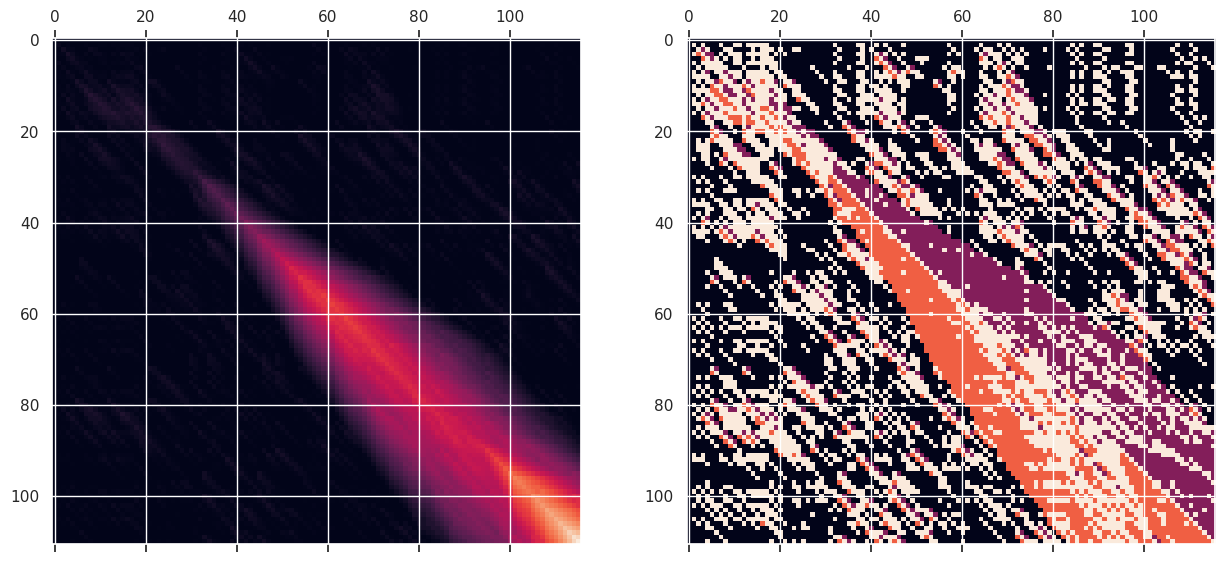

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(30)
ax[0].matshow(score_matrix)
ax[1].matshow(trace_df)



# Searching a Query Sequence against a Database

Now we will search Protein 1 against a database of proteins obtained from the Ensembl database. In this case we used Ensembl BioMart to Download all currently annotated human protein sequences.

Sequences are usually stored in a FASTA text file. This is the name of the format used, but also the name of a particular software package by Bill Pearson.

The FASTA format looks like this:

```
>Sequence1 Description
ATGAGAGAGAGAGAGAGAGAGAGGCACAAA
>Sequence2 Description
CGATACGGCACGGATATATATAAACCAA
```

In each case the greater than symbol '>' denotes a sequence identifier and a space separated descrition. 
Lines that do not contain a '>' store the sequence associated with the above identifier.

FASTA files can store DNA, RNA or Proteins and can contain thousands of entries.

We can use *BioPython* to read a FASTA file sequence by sequence.


In [ ]:
from Bio import SeqIO
import time

# Open a FASTA file to a BioPython Object ready for reading
fasta_sequences = SeqIO.parse(open("human.fasta"),'fasta')

# Create a timer to see how long it takes to align 10 sequences
start=time.time()


# Loop over 10 sequences
for i in range(1,10):
    
    # Fetch the next FASTA sequence from the FASTA file
    record=next(fasta_sequences)    
    row = len(Protein1) + 1
    col = len(record.seq) + 1
    
    # Recreate the matrices
    tracing_matrix = np.zeros(shape=(row, col), dtype=int)  
    score_matrix = np.zeros(shape=(row, col), dtype=int)  

    # Actual alignment happens here of Protein1 versus each of the 10 sequences
    output_1, output_2, score = smith_waterman(Protein1, record.seq)
    print('Local Alignment Score:'+ str(score) + '\n'+'Sequence1:' + output_1 + '\n' + 'Sequence2:'  +  output_2)

# Stop Timing
end=time.time()

print("\n" + "Time Elapsed: " + str(end-start) + " Seconds")    

Local Alignment Score:37
Sequence1:GGGPGA-GSLQPLALEGSLQKRGIVEQCCTSICSLYQ
Sequence2:GAGPGEQGGGK-LVLS-SLPKR-LC-LVCGDVASGYH
Local Alignment Score:28
Sequence1:PAAAFVNQHLCGSHLVEA-LYLVC
Sequence2:PGRLF-DQRF-GEGLLEAELAALC
Local Alignment Score:28
Sequence1:GPGAGS-L-Q-PLALEGSLQKRG
Sequence2:GPGFYNVIHQSPVSNSVSLSKKG
Local Alignment Score:44
Sequence1:PKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENY
Sequence2:PKDDQELEELMLEEVEVFKDP-A-PVKTMTISSKRQQLYVASAVGVTHLSLHRCQAY
Local Alignment Score:33
Sequence1:PGAGSLQPLALEGSLQKRGIVEQ
Sequence2:PNEGAIVEVALEGYYKDK-LFDQ
Local Alignment Score:27
Sequence1:VEQCCTSICSLYQ-LEN-YCN
Sequence2:IQDLKTCIASTTQTIEQMYCD
Local Alignment Score:30
Sequence1:AGSLQPLALEGSLQ
Sequence2:AGMLV-LSIQGNLQ
Local Alignment Score:32
Sequence1:LALEGSLQKRGIVEQCCTSICS
Sequence2:LARDKTLQKKCYLEQK-T-VCG
Local Alignment Score:29
Sequence1:GFFYTPK-TRREAEDLQVGQVELGGGP
Sequence2:GYLRSPSWTRTRAEQSHEKQ-PLGD-P

Time Elapsed: 25.43230175971985 Seconds


## Optimising our code for Speed

How can we make the code run quicker.

The key area we need to look is within the i,j inner loop. Any calculation here is happening at every cell in the matrix. Anything we can do to remove duplicated operations or unneccesary code is useful here to speed things up.

If we are performing a global search and are only interested in scoring, the first thing we can do is to **not** traceback at all and just fetch the best scores in each case:


In [ ]:
def smith_waterman_faster(seq1, seq2):
    # Generating the empty matrices for storing scores and tracing
    row = len(seq1) + 1
    col = len(seq2) + 1  
    max_score = -1    
    for i in range(1, row):
        for j in range(1, col):
            match_value = blosum62[seq1[i - 1]][seq2[j - 1]]
            diagonal_score = score_matrix[i - 1, j - 1] + match_value
            vertical_score = score_matrix[i - 1, j] + Score.GAP
            horizontal_score = score_matrix[i, j - 1] + Score.GAP
            score_matrix[i, j] = max(0,diagonal_score, vertical_score, horizontal_score)
            if score_matrix[i, j] >= max_score:
                max_score = score_matrix[i, j]
  
            # Traceback code has been removed, we only return the max score.

    return max_score

In [ ]:
fasta_sequences = SeqIO.parse(open("human.fasta"),'fasta')

start=time.time()
score_matrix = np.zeros(shape=(len(Protein1)+1, 5000), dtype=int)  

for i in range(1,10):
    record=next(fasta_sequences)    
    score = smith_waterman_faster(Protein1, record.seq)
    print('Local Alignment Score:'+ str(score))


end=time.time()

print("\n" + "Time Elapsed: " + str(end-start) + " Seconds")    

Local Alignment Score:37
Local Alignment Score:28
Local Alignment Score:28
Local Alignment Score:44
Local Alignment Score:33
Local Alignment Score:27
Local Alignment Score:30
Local Alignment Score:32
Local Alignment Score:29

Time Elapsed: 2.137376546859741 Seconds


## Task 6

Explore the code above to see where you might be able to save time and get faster alignments.

In particular look at anything being computed multiple times or things are are directly looked up elsewhere that could be hard-coded, e.g. GAP penalties.



In [ ]:
def smith_waterman_even_faster(seq1, seq2):
    # Generating the empty matrices for storing scores and tracing
    row = len(seq1) + 1
    col = len(seq2) + 1  
    max_score = -1    
    for i in range(1, row):
        for j in range(1, col):
            score_matrix[i, j] = max(0,score_matrix[i - 1, j - 1] + blosum62[seq1[i - 1]][seq2[j - 1]], score_matrix[i - 1, j] + Score.GAP, score_matrix[i, j - 1] + Score.GAP)
            if score_matrix[i, j] >= max_score:
                max_score = score_matrix[i, j]
  
            # Traceback code has been removed, we only return the max score.

    return max_score

In [ ]:
fasta_sequences = SeqIO.parse(open("human.fasta"),'fasta')

start=time.time()
score_matrix = np.zeros(shape=(len(Protein1)+1, 5000), dtype=int)  

for i in range(1,10):
    record=next(fasta_sequences)    
    score = smith_waterman_even_faster(Protein1, record.seq)
    print('Local Alignment Score:'+ str(score))


end=time.time()

print("\n" + "Time Elapsed: " + str(end-start) + " Seconds")    

Local Alignment Score:37
Local Alignment Score:28
Local Alignment Score:28
Local Alignment Score:44
Local Alignment Score:33
Local Alignment Score:27
Local Alignment Score:30
Local Alignment Score:32
Local Alignment Score:29

Time Elapsed: 2.1190459728240967 Seconds


-----

Keep trying different optimisations and see how much time you can save on the alignment over 10 sequences.

Remember, some of the speed is down to stochastic factors such as how busy the computer is, but in general good optimisations may allow up to a 20-30% speed increase for reasonably well written code.

____

## Making a More Optimal Lookup Table

Part of the reason we are so slow here, is that amino acids as strings or characters are being lookup up in a dataframe object by those strings.

It is almost always faster to lookup via integers directly into an 2D integer matrix.

One trick we can do is to convert an amino acid character, e.g. Valine - V, to an ASCII value. This is the standard encoding computers use for single characters for keyboard or terminal displays.

ASCII stands for American Standard Code for Information Interchange. Below is the ASCII character table, including descriptions of the first 32 characters. ASCII was originally designed for use with teletypes, and so the descriptions are somewhat obscure and their use is frequently not as intended.

```
ASCII Table

Dec  = Decimal Value
Char = Character

'5' has the int value 53
if we write '5'-'0' it evaluates to 53-48, or the int 5
if we write char c = 'B'+32; then c stores 'b'


Dec  Char                           Dec  Char     Dec  Char     Dec  Char
---------                           ---------     ---------     ----------
  0  NUL (null)                      32  SPACE     64  @         96  `
  1  SOH (start of heading)          33  !         65  A         97  a
  2  STX (start of text)             34  "         66  B         98  b
  3  ETX (end of text)               35  #         67  C         99  c
  4  EOT (end of transmission)       36  $         68  D        100  d
  5  ENQ (enquiry)                   37  %         69  E        101  e
  6  ACK (acknowledge)               38  &         70  F        102  f
  7  BEL (bell)                      39  '         71  G        103  g
  8  BS  (backspace)                 40  (         72  H        104  h
  9  TAB (horizontal tab)            41  )         73  I        105  i
 10  LF  (NL line feed, new line)    42  *         74  J        106  j
 11  VT  (vertical tab)              43  +         75  K        107  k
 12  FF  (NP form feed, new page)    44  ,         76  L        108  l
 13  CR  (carriage return)           45  -         77  M        109  m
 14  SO  (shift out)                 46  .         78  N        110  n
 15  SI  (shift in)                  47  /         79  O        111  o
 16  DLE (data link escape)          48  0         80  P        112  p
 17  DC1 (device control 1)          49  1         81  Q        113  q
 18  DC2 (device control 2)          50  2         82  R        114  r
 19  DC3 (device control 3)          51  3         83  S        115  s
 20  DC4 (device control 4)          52  4         84  T        116  t
 21  NAK (negative acknowledge)      53  5         85  U        117  u
 22  SYN (synchronous idle)          54  6         86  V        118  v
 23  ETB (end of trans. block)       55  7         87  W        119  w
 24  CAN (cancel)                    56  8         88  X        120  x
 25  EM  (end of medium)             57  9         89  Y        121  y
 26  SUB (substitute)                58  :         90  Z        122  z
 27  ESC (escape)                    59  ;         91  [        123  {
 28  FS  (file separator)            60  <         92  \        124  |
 29  GS  (group separator)           61  =         93  ]        125  }
 30  RS  (record separator)          62  >         94  ^        126  ~
 31  US  (unit separator)            63  ?         95  _        127  DEL
```

To get the ASCII value of a character we can use the following function *ord*


In [ ]:
ord('V')

86

-----------
So the ASCII value of 'V' is 86.

There are only 255 ASCII values possible, so we will cheat by creating a 255x255 integer matrix to store match values. We will call this *blosum62*.

This will be much quicker than our previous dataframe lookup.

In [ ]:
# Create a new Numpy Matrix for rapid lookup of amino acid pairing scores
blosum_matrix = np.zeros(shape=(255, 255), dtype=int)  

# Populate the new object with values from the dataframe, we will rapidly lookup by using the integer value
# of each amino-acids ASCII value
for row in blosum62.index.values:
    for col in blosum62.columns:
        blosum_matrix[ord(row),ord(col)]=blosum62[row][col]
        
        
def smith_waterman_even_more_fasterer(seq1, seq2):
    max_score = -1    
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1 ):
            score_matrix[i, j] = max(0,score_matrix[i - 1, j - 1] + blosum_matrix[ord(seq1[i - 1])][ord(seq2[j - 1])], score_matrix[i - 1, j] -10, score_matrix[i, j - 1] -10)
            if score_matrix[i, j] > max_score:
                max_score = score_matrix[i, j]
    return max_score

In [ ]:
fasta_sequences = SeqIO.parse(open("human.fasta"),'fasta')

start=time.time()
score_matrix = np.zeros(shape=(len(Protein1)+1, 5000), dtype=int)  

for i in range(1,10):
    record=next(fasta_sequences)    
    score = smith_waterman_even_more_fasterer(Protein1, record.seq)
    print('Local Alignment Score:'+ str(score))


end=time.time()

print("\n" + "Time Elapsed: " + str(end-start) + " Seconds")  

Local Alignment Score:32
Local Alignment Score:25
Local Alignment Score:28
Local Alignment Score:37
Local Alignment Score:32
Local Alignment Score:26
Local Alignment Score:26
Local Alignment Score:30
Local Alignment Score:23

Time Elapsed: 0.5060677528381348 Seconds


-----

This should be much, much faster

-----


# Large-Scale searching

Now that we have made this much faster, let's explore how long it would take to run 1000 random human protein sequences, or more.

This should take about 2 minutes.

We will store the maximum local alignment score in an array called *result_array*

We put a little print statement in the loop that uses a modulo operator %.
```
i % 50 
```

This operator tests if *i* can be divided by the second value (50) with a remainder or not.

If *i* is a multiple of 50 it will return zero, we use this to print a little dot at every 50 sequences to give us a simple progress bar, so we know how long the run might take.


Hopefully, this should run in approximately 2 minutes. We will compare how long this takes to both FASTA and BLAST heuristic algorithms later.

In [ ]:
fasta_sequences = SeqIO.parse(open("human.fasta"),'fasta')

start=time.time()
score_matrix = np.zeros(shape=(len(Protein1)+1, 5000), dtype=int)
result_array=np.zeros(shape=(1000),dtype=int)

print("Scanning 1000 Sequences, Storing Results:[", end="")
for i in range(0,1000):
    record=next(fasta_sequences)    
    result_array[i] = smith_waterman_even_more_fasterer(Protein1, record.seq)
    
    # Use a modulo operator to see if we have done another 50 sequences, if so, print a dot
    if (i % 50) == 0:
        print (".", end="")
        
        
end=time.time()
print("]")
print("\n" + "Time Elapsed: " + str(end-start) + " Seconds")  

Scanning 1000 Sequences, Storing Results:[....................]

Time Elapsed: 58.80266451835632 Seconds


----
We should now have a list of the maximum local alignment over 1000 sequences, see below.

This should form an extreme value distribution (EVD).

In [ ]:
result_array

array([32, 25, 28, 37, 32, 26, 26, 30, 23, 30, 36, 28, 32, 32, 27, 29, 20,
       32, 26, 32, 30, 27, 30, 32, 27, 33, 27, 27, 22, 34, 25, 23, 32, 38,
       33, 32, 27, 32, 22, 24, 24, 32, 29, 22, 33, 32, 26, 27, 51, 26, 19,
       28, 33, 29, 23, 26, 33, 39, 32, 26, 27, 35, 22, 23, 31, 33, 22, 25,
       31, 28, 24, 26, 36, 35, 26, 32, 23, 25, 31, 27, 32, 27, 29, 29, 29,
       29, 31, 30, 32, 31, 33, 29, 22, 28, 23, 23, 30, 31, 30, 26, 31, 35,
       33, 25, 25, 30, 26, 27, 35, 29, 29, 38, 26, 31, 26, 33, 25, 26, 40,
       23, 35, 23, 34, 36, 28, 20, 25, 24, 38, 30, 29, 30, 30, 30, 35, 27,
       24, 34, 37, 28, 30, 31, 31, 33, 25, 36, 19, 27, 31, 36, 32, 25, 33,
       35, 23, 35, 30, 30, 25, 25, 33, 28, 48, 26, 31, 32, 29, 35, 25, 27,
       25, 29, 26, 29, 38, 31, 34, 34, 30, 28, 27, 34, 34, 21, 35, 33, 27,
       30, 34, 33, 32, 28, 24, 19, 27, 27, 24, 26, 36, 26, 29, 40, 26, 29,
       29, 35, 30, 27, 29, 40, 31, 36, 32, 25, 36, 32, 32, 28, 31, 33, 29,
       32, 32, 38, 32, 30

---
## Distribution of scores obtained

Lets use *seaborn* to plot a histogram of the 1000 values and a density function (Kernel Density Estimate, KDE) summary of the data.


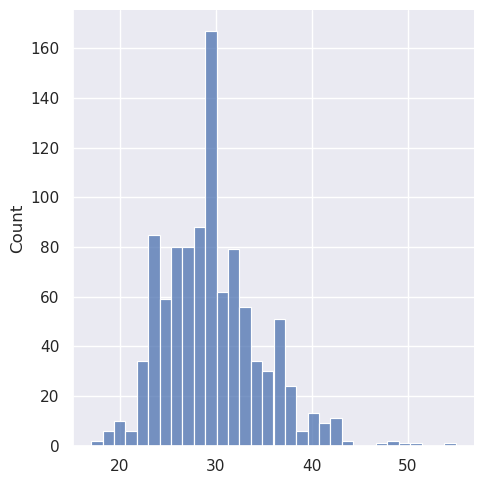

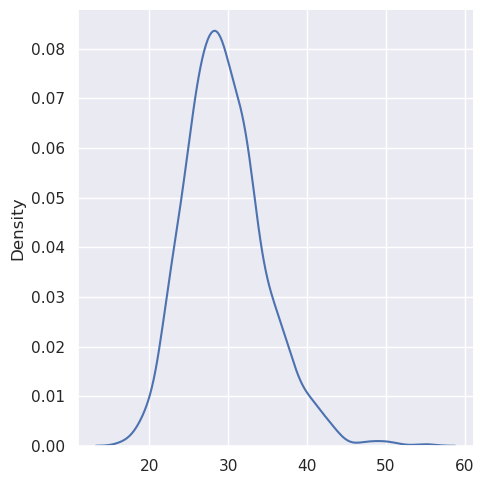

In [ ]:
sns.displot(result_array)

sns.displot(result_array,kind="kde")




## Maximum Likelihood fitting of an EVD to our data

We will use *scipy* to use a gumbel distribution ML fitting strategy to our data to evaluate the location and scale of the distribution. 

In [ ]:
import scipy.stats as stats

# Fit to a Gumbel distribtion
loc, scale = stats.gumbel_r.fit(result_array)
print(loc)
print(scale)



27.208746386977282
4.349815184512953


# Task 7

Given the location and scale we've obtained above, we can compute the significance of a particular score roughly by fitting it to the EVD formula.

Compute the probability of obtaining a Score of >**32.0** based on the EVD we've built from 1000 random sequences

$$ P(S>X) = 1- e^{-e^{-((myscore-location)/scale)}} $$

Hint you can use the math module to work out $e^x$ as follows
```
import math
math.exp(x)
```

In [ ]:
import math

# Write some python code using math.exp to test the significance of a value of X=32 with
# location and scale parameters derived above

p = 1 - np.exp(-1*np.exp(-(32-loc)/scale))
p


0.28278335773143826

----
# Large-scale Searching with BLAST or FASTA

Lets perform the same search using either BLAST or FASTA an see how long they take.

For BLAST we need to first create a database broken down by kmers to search against.
For FASTA it will compute this on the fly.

Lets test we can find the FASTA program, using an exclamation mark at the start of a code block, runs the code as if from a terminal.

If FASTA is found it should run and tell us its version and some basic options

In [ ]:
!fasta36

USAGE
 fasta36 [-options] query_file library_file [ktup]
 fasta36 -help for a complete option list

DESCRIPTION
 FASTA searches a protein or DNA sequence data bank
 version: 36.3.8h May, 2020

COMMON OPTIONS (options must preceed query_file library_file)
 -s:  scoring matrix;
 -f:  gap-open penalty;
 -g:  gap-extension penalty;
 -S   filter lowercase (seg) residues;
 -b:  high scores reported (limited by -E by default);
 -d:  number of alignments shown (limited by -E by default);
 -I   interactive mode;


## Creating a FASTA file

We want to use BLAST and FASTA so we need to put our query sequences in a proper FASTA format file.

To do this we will use the *sys* system commands of perl to redirect our output from standard output (*stdout*) to a new destination, i.e. a new file called *myprotein.fasta* in the current working directory.

We do this with
```
open('myprotein.fasta', 'w') as f
```

and 

```
sys.stdout = f
```

We can then print a FASTA header with a '>' beginning and some description, followed by a sequence.
If we want multiple sequences we need a FASTA header on the line(s) before each sequence.

Now when things are printed they go to a text file and not back into the notebook output.

When we are done, we need to restore the output destination back to *stdout* as follows.

```
sys.stdout = orig_stdout 
```


In [ ]:
import sys

# Store the current output direction
orig_stdout = sys.stdout

# Open a new file
with open('myprotein.fasta', 'w') as f:
    
    # Set the new file as the default output location
    sys.stdout = f
    
    # Print our 2 line FASTA file
    print(">myprotein\tThis is my protein sequence")
    print(Protein1)
    
    # Redirect output back to normal
    sys.stdout = orig_stdout # Reset the standard output to its original value

    

If this worked, we should be able to see this file on our Desktop with the cat command

In [ ]:
!cat myprotein.fasta

>myprotein	This is my protein sequence
MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN


## Running FASTA on our sequences

Ok we are now ready to launch FASTA on our query *myprotein.fasta* against the 1000 human sequences *human.fasta*

Lets also use the *-s* option to ask for the BLOSUM62 matrix and the same gap penalties we used earlier.

In [ ]:
!fasta36 -s BL62 -f -6 -g -6 myprotein.fasta  human.fasta

# fasta36 -s BL62 -f -6 -g -6 myprotein.fasta human.fasta
FASTA searches a protein or DNA sequence data bank
 version 36.3.8h May, 2020
Please cite:
 W.R. Pearson & D.J. Lipman PNAS (1988) 85:2444-2448

Query: myprotein.fasta
  1>>>myprotein This is my protein sequence - 110 aa
Library: human.fasta
  1512898 residues in  2979 sequences

Statistics:  Expectation_n fit: rho(ln(x))= 2.3131+/-0.00137; mu= 17.2001+/- 0.077
 mean_var=16.5584+/- 3.588, 0's: 0 Z-trim(91.9): 5  B-trim: 0 in 0/37
 Lambda= 0.315185
 statistics sampled from 1070 (1071) to 1070 sequences
Algorithm: FASTA (3.8 Nov 2011) [optimized]
Parameters: BL62 matrix (11:-4), open/ext: -6/-6
 ktup: 2, E-join: 1 (0.75), E-opt: 0.2 (0.36), width:  16
 Scan time:  0.020

The best scores are:                                      opt bits E(2979)
ENSG00000254647|ENST00000250971|ENST00000250971.7| ( 110)  589 270.9 9.9e-75
ENSG00000091157|ENST00000254442|ENST00000254442.8| (1490)   59 31.0    0.23
ENSG00000108474|ENST00000225609|ENST

Explore the results obtained by FASTA. You should see one very high scoring hit to Insulin which just happens to be within our proteins in the file *my_proteins.fasta*

____


## Running BLAST on our data 

To use the extremely fast BLAST tool we need to prepare the kmer database that BLAST uses to quickly find High Scoring Pairs (HSPs)

Lets test if the *makeblastdb* function is installed on our terminal and see its options:


In [ ]:
!makeblastdb

USAGE
  makeblastdb [-h] [-help] [-in input_file] [-input_type type]
    -dbtype molecule_type [-title database_title] [-parse_seqids]
    [-hash_index] [-mask_data mask_data_files] [-mask_id mask_algo_ids]
    [-mask_desc mask_algo_descriptions] [-gi_mask]
    [-gi_mask_name gi_based_mask_names] [-out database_name]
    [-blastdb_version version] [-max_file_sz number_of_bytes]
    [-metadata_output_prefix ] [-logfile File_Name] [-taxid TaxID]
    [-taxid_map TaxIDMapFile] [-version]

DESCRIPTION
   Application to create BLAST databases, version 2.13.0+

Use '-help' to print detailed descriptions of command line arguments

Error: Argument "dbtype". Mandatory value is missing:  `String, `nucl', `prot''
Error:  (CArgException::eNoArg) Argument "dbtype". Mandatory value is missing:  `String, `nucl', `prot''


### Formatting our human.fasta for BLAST

We will run *makeblastdb* and tell it that we have a database called *human.fasta* and our database type is *protein*

```
-dbtype prot
```

If this were a DNA or RNA search we would set that flag to *nucl*

In [ ]:
!makeblastdb -in human.fasta -dbtype prot



Building a new DB, current time: 11/09/2022 16:14:01
New DB name:   /home/participant/Course_Materials/human.fasta
New DB title:  human.fasta
Sequence type: Protein
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 2979 sequences in 0.045294 seconds.




Lets explore what files were created by running the list directory command (unix and mac it's *ls*).

We should see new files in our folder that have extra file extensions beyond *human.fasta*, e.g. *human.fasta.pin*

These are the indexing files where the kmer dictionary for the database is stored.

In [ ]:
!ls

'Sequence Alignment MCB.ipynb'	 human.fasta.phr   human.fasta.psq
 Untitled.ipynb			 human.fasta.pin   human.fasta.ptf
 human.fasta			 human.fasta.pjs   human.fasta.pto
 human.fasta.pdb		 human.fasta.pot   myprotein.fasta


## Running BLAST in Protein Mode (BLASTp)

We will now perform a protein BLAST search specifying our query sequence *myprotein.fasta* against our preformatted database based on *human.fasta*.

We will use the default options.

To see the options you can run the following from the command line (--help):

For nucleotide BLAST we would use *blastn*.

In [ ]:
!blastp --help

USAGE
  blastp [-h] [-help] [-import_search_strategy filename]
    [-export_search_strategy filename] [-task task_name] [-db database_name]
    [-dbsize num_letters] [-gilist filename] [-seqidlist filename]
    [-negative_gilist filename] [-negative_seqidlist filename]
    [-taxids taxids] [-negative_taxids taxids] [-taxidlist filename]
    [-negative_taxidlist filename] [-ipglist filename]
    [-negative_ipglist filename] [-entrez_query entrez_query]
    [-db_soft_mask filtering_algorithm] [-db_hard_mask filtering_algorithm]
    [-subject subject_input_file] [-subject_loc range] [-query input_file]
    [-out output_file] [-evalue evalue] [-word_size int_value]
    [-gapopen open_penalty] [-gapextend extend_penalty]
    [-qcov_hsp_perc float_value] [-max_hsps int_value]
    [-xdrop_ungap float_value] [-xdrop_gap float_value]
    [-xdrop_gap_final float_value] [-searchsp int_value] [-seg SEG_options]
    [-soft_masking soft_masking] [-matrix matrix_name]
    [-threshold float_value] [-c

-------

Ok we are ready to run BLAST:
    
    

In [ ]:
!blastp -query myprotein.fasta -db human.fasta

BLASTP 2.13.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.


Reference for composition-based statistics: Alejandro A. Schaffer,
L. Aravind, Thomas L. Madden, Sergei Shavirin, John L. Spouge, Yuri
I. Wolf, Eugene V. Koonin, and Stephen F. Altschul (2001),
"Improving the accuracy of PSI-BLAST protein database searches with
composition-based statistics and other refinements", Nucleic Acids
Res. 29:2994-3005.



Database: human.fasta
           2,979 sequences; 1,512,898 total letters



Query= myprotein

Length=110
                                                                      Score     E
Sequences producing significant alignments:                          (Bits)  Value

ENSG00000254647|ENST00000250971|ENST00000250971.7|insulin [Source...  223     1e-78
ENSG00000091157

# Task 8

Write a simple piece of python to create a new FASTA file, e.g. *insulin.fasta* that contains three of the insulin sequences you created above.

* Human_Insulin
* Bovine_Insulin
* Seahag_Insulin

Feel free to add any other sequences you like, as long as they are proteins.

Using both BLAST and FASTA explore the results obtained from your new FASTA file.

The BLAST database is already formatted correctly, so no need to make it again for our *human.fasta* file.

In [ ]:
## Prepare code similar to above to make a new FASTA file and put sequences in it

import sys

# Store the current output direction
orig_stdout = sys.stdout

# Open a new file
with open('myprotein.fasta', 'w') as f:
    
    # Set the new file as the default output location
    sys.stdout = f
    
    # Print our 2 line FASTA file
    print(">myprotein\tThis is my protein sequence")
    print(Human_Insulin)
    
    # Redirect output back to normal
    sys.stdout = orig_stdout # Reset the standard output to its original value

    




!cat myprotein.fasta

>myprotein	This is my protein sequence
MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN


In [ ]:
## Run BLAST from commandline using ! 

!blastp -query myprotein.fasta -db human.fasta





BLASTP 2.13.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.


Reference for composition-based statistics: Alejandro A. Schaffer,
L. Aravind, Thomas L. Madden, Sergei Shavirin, John L. Spouge, Yuri
I. Wolf, Eugene V. Koonin, and Stephen F. Altschul (2001),
"Improving the accuracy of PSI-BLAST protein database searches with
composition-based statistics and other refinements", Nucleic Acids
Res. 29:2994-3005.



Database: human.fasta
           2,979 sequences; 1,512,898 total letters



Query= myprotein

Length=110
                                                                      Score     E
Sequences producing significant alignments:                          (Bits)  Value

ENSG00000254647|ENST00000250971|ENST00000250971.7|insulin [Source...  223     1e-78
ENSG00000091157

In [ ]:
## Run FASTA from commandline using ! 







Try playing with the options for both programs to explore how the results change.

# Final Task (Advanced)

Modify either the Needleman Wunsch or Smith-Waterman code above to implement Affine Gap Penalties.

Remember from the lecture that for this you will need to introduce 2 new matrices, so that you have *TOP* *MIDDLE* and *BOTTOM*

Each will need to be initialised in a different way depending on if it is Needleman-Wunsch (NW) or Smith-Waterman (SW).

You will traceback from the maximum score starting at the highest value in the bottom right cell of any of those three matrices.

You will end the alignment at either the top left of any matrix (NW) or the first zero value (SW).

In [ ]:
## Create and initialise scoring and traceback matrices here
# Use this code block to reinitialise your matrices for new sequences


# Prepare a traceback and scoring matrix for use below
row = len(Let7a1) + 1
col = len(Let7a2) + 1
tracing_matrix = np.zeros(shape=(row, col), dtype=int)  
score_matrix = np.zeros(shape=(row, col), dtype=int)  



In [ ]:
## Create your new Affine Gap routine here, give it a new name



# Assigning the constants for the scores
class Score(int):
    MATCH = 4
    MISMATCH = -4
    GAP = -6

# Assigning the constant values for the traceback
class Trace(int):
    STOP = 0
    LEFT = 1 
    UP = 2
    DIAGONAL = 3

# Implementing the Smith Waterman local alignment
def smith_waterman(seq1, seq2):
    # Generating the empty matrices for storing scores and tracing
    row = len(seq1) + 1
    col = len(seq2) + 1
    
    score_matrix[:, :] = 0
    tracing_matrix[:, :] = 0
    
    # Initialising the variables to find the highest scoring cell
    max_score = -1
    max_index = (-1, -1)
    
    # Calculating the scores for all cells in the matrix
    for i in range(1, row):
        for j in range(1, col):
            # Calculating the diagonal score (match score)
            match_value = Score.MATCH if seq1[i - 1] == seq2[j - 1] else Score.MISMATCH
            diagonal_score = score_matrix[i - 1, j - 1] + match_value
            
            # Calculating the vertical gap score
            vertical_score = score_matrix[i - 1, j] + Score.GAP
            
            # Calculating the horizontal gap score
            horizontal_score = score_matrix[i, j - 1] + Score.GAP
            
            # Taking the highest score 
            score_matrix[i, j] = max(0,diagonal_score, vertical_score, horizontal_score)
            
            # Tracking where the cell's value is coming from    
            if score_matrix[i, j] == 0: 
                tracing_matrix[i, j] = Trace.STOP
                
            elif score_matrix[i, j] == horizontal_score: 
                tracing_matrix[i, j] = Trace.LEFT
                
            elif score_matrix[i, j] == vertical_score: 
                tracing_matrix[i, j] = Trace.UP
                
            elif score_matrix[i, j] == diagonal_score: 
                tracing_matrix[i, j] = Trace.DIAGONAL 
                
            # Tracking the cell with the maximum score
            if score_matrix[i, j] >= max_score:
                max_index = (i,j)
                max_score = score_matrix[i, j]
    
    # Initialising the variables for tracing
    aligned_seq1 = ""
    aligned_seq2 = ""   
    current_aligned_seq1 = ""   
    current_aligned_seq2 = ""  
    (max_i, max_j) = max_index
    
    # Tracing and computing the pathway with the local alignment
    while tracing_matrix[max_i, max_j] != Trace.STOP:
        if tracing_matrix[max_i, max_j] == Trace.DIAGONAL:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = seq2[max_j - 1]
            max_i = max_i - 1
            max_j = max_j - 1
            
        elif tracing_matrix[max_i, max_j] == Trace.UP:
            current_aligned_seq1 = seq1[max_i - 1]
            current_aligned_seq2 = '-'
            max_i = max_i - 1    
            
        elif tracing_matrix[max_i, max_j] == Trace.LEFT:
            current_aligned_seq1 = '-'
            current_aligned_seq2 = seq2[max_j - 1]
            max_j = max_j - 1
            
        aligned_seq1 = aligned_seq1 + current_aligned_seq1
        aligned_seq2 = aligned_seq2 + current_aligned_seq2
    
    # Reversing the order of the sequences
    aligned_seq1 = aligned_seq1[::-1]
    aligned_seq2 = aligned_seq2[::-1]
    return aligned_seq1, aligned_seq2, max_score




In [ ]:
## Test your creation here by comparing two sequences using your new fancy affine-gap implementation!






Compare the results you get versus the results you might get from BLAST or FASTA and perhaps try implementing it to run across all the sequences in the *human.fasta* file to compare its speed versus BLAST and FASTA which are very optimised heuristic methods.



In [ ]:
# Comparison of your results to either BLAST or FASTA, could also use web-versions of tools, see next section
#
#


In [ ]:
# Empty code block for playing
#
#




# Final Notes

You can frequently find it convenient to run BLAST or FASTA or NW using online tools such as those at EBI.

These tools use a web-interface and you can paste batches of sequences into them and wait for a result to be obtained on their servers.

* [EBI NW (Needler)](https://www.ebi.ac.uk/Tools/emboss/)
* [EBI SW (Water)](https://www.ebi.ac.uk/Tools/emboss/)
* [EBI BLAST](https://www.ebi.ac.uk/Tools/sss/ncbiblast/)

Having implemented these algorithms yourself, you should have a great understanding of their outputs and how to interpret these results.
